In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [29]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [30]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [31]:
dataset = pd.read_csv("csv/adm_data.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.63949795278001 Generation best 0.618145639612750211
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.6360540313014197 Generation best 0.6189874870852945
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.6356713733593541 Generation best 0.6339111468258524
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.6382734473654001 Generation best 0.6273294302223242
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6411051161366854 Generation best 0.6346764627099836
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.636895878773964 Generation best 0.63658975242031155
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6293957831094784 Generation best 0.6150843760762255
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.6382734473654001 Generation best 0.6316917307618719


In [33]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
8
8
8
8
8
8
8


In [34]:
tester.test_models(notests=30)

Iteration 4 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274457002846998, NEW_MAE 0.04540306719103827
Iteration 9 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274457002846998, NEW_MAE 0.04540306719103827
Iteration 14 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274457002846998, NEW_MAE 0.04540306719103827
Iteration 19 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274457002846998, NEW_MAE 0.04540306719103827
Iteration 24 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274457002846998, NEW_MAE 0.04540306719103827
Iteration 29 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004299016624813242, NEW_R2 0.8274

In [35]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,0.004368,0.824676,0.046347,0.004299,0.827446,0.045403
1,SGDRegressor,0.004477,0.820300,0.046447,0.004407,0.823131,0.046877
2,GradientBoostingRegressor,0.006944,0.721282,0.053167,0.006159,0.752795,0.053042


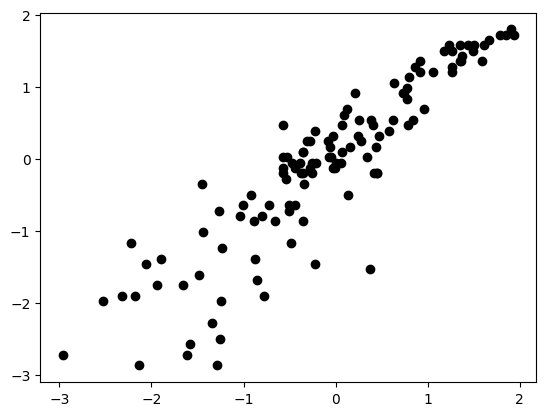

Min:  -2.9626852818004905 Max:  1.9336719588006743 Mean:  -0.09110996592973185 Std:  1.0672644275020846


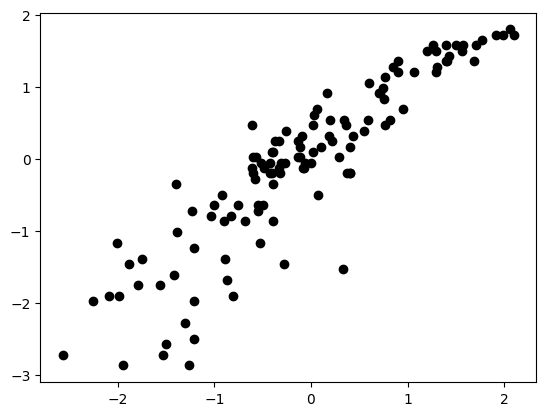

Min:  -2.5675722971586885 Max:  2.0968830323309917 Mean:  -0.08371030228624939 Std:  1.0458936539619998


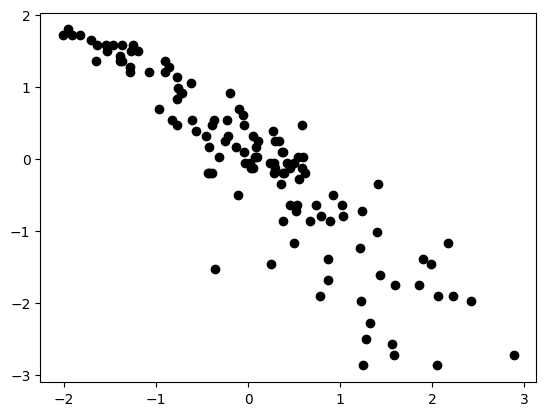

Min:  -2.0113994059340756 Max:  2.883590082703538 Mean:  0.08912706045875445 Std:  1.0595725267916112


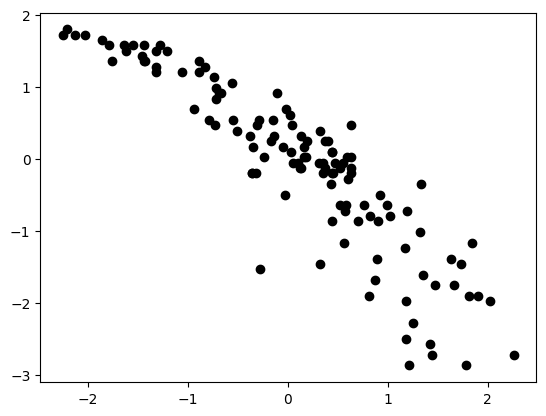

Min:  -2.250671338978741 Max:  2.2587992577220932 Mean:  0.07767776960387217 Std:  1.0301903395616514


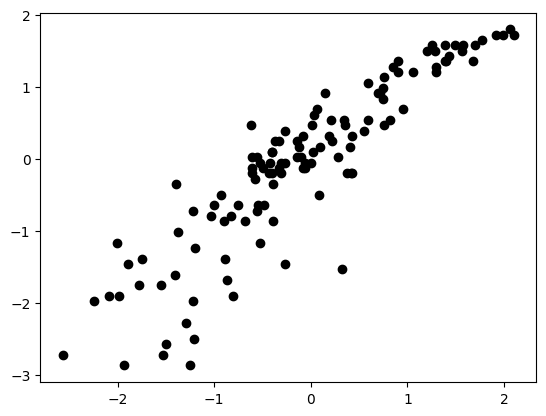

Min:  -2.568961089989286 Max:  2.1003767513288896 Mean:  -0.08389762706573542 Std:  1.0450032931852322


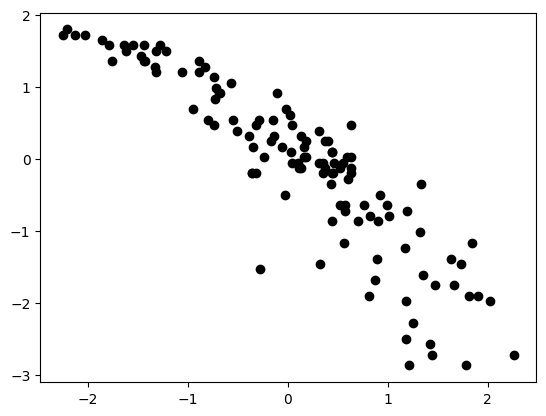

Min:  -2.2490402027727554 Max:  2.259939859468841 Mean:  0.07771984190284455 Std:  1.030297144029563


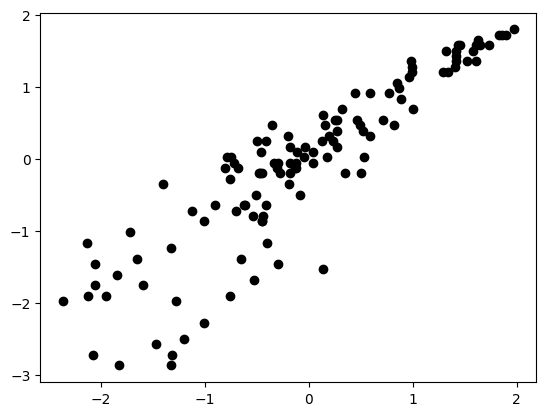

Min:  -2.364886908860189 Max:  1.9720259535318936 Mean:  -0.05017272373767871 Std:  1.0560312002133838


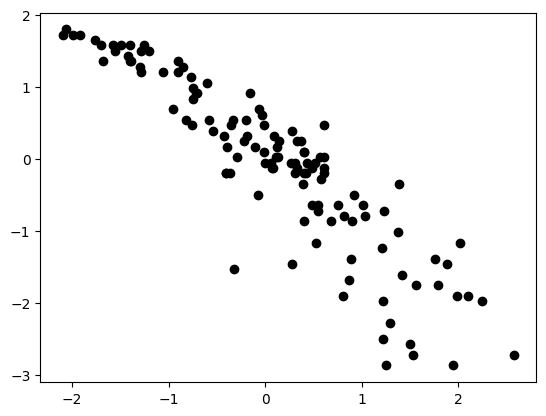

Min:  -2.097497252478478 Max:  2.5733894947199154 Mean:  0.08374393621743194 Std:  1.0462538400469137


In [36]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())